## Imports 

In [246]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFE, SequentialFeatureSelector, VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import mean_squared_error, r2_score


## Import tech company salary dataset

In [247]:
# Read the CSV file 'tech_companies_salary.csv' into a pandas DataFrame object called 'df'
df = pd.read_csv('tech_companies_salary.csv')

# Define the minimum and maximum valid salary range (for example, salaries should be between 30,000 and 450,000)
# These values are arbitrary and may need to be adjusted based on the specific data and requirements
min_salary = 30000
max_salary = 450000

# Apply a transformation to the 'totalyearlycompensation' column to fix values that are too large or too small
# The lambda function checks each value in the column:
#   - if the value is greater than the max_salary, it divides the value by 10 (assuming it's an error in the data)
#   - if the value is less than or equal to the max_salary but greater than the min_salary, it leaves the value unchanged
#   - if the value is less than or equal to the min_salary, it leaves the value unchanged 
df['totalyearlycompensation'] = df['totalyearlycompensation'].apply(
    lambda x: x / 10 if x > max_salary else (x if x > min_salary else x)
)

# Display the first few rows of the DataFrame to verify the changes
df.head()

,timestamp,company,level,title,totalyearlycompensation,location,yearsofexperience,yearsatcompany,tag,basesalary,...,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education
0,06-07-2017 11:33,Oracle,L3,Product Manager,127000.0,"Redwood City, CA",1.5,1.5,NaN,107000,...,0,0,0,0,0,0,0,0,NaN,NaN
1,06-10-2017 17:11,eBay,SE 2,Software Engineer,100000.0,"San Francisco, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN
2,06-11-2017 14:53,Amazon,L7,Product Manager,310000.0,"Seattle, WA",8.0,0.0,NaN,155000,...,0,0,0,0,0,0,0,0,NaN,NaN
3,6/17/2017 0:23:14,Apple,M1,Software Engineering Manager,372000.0,"Sunnyvale, CA",7.0,5.0,NaN,157000,...,0,0,0,0,0,0,0,0,NaN,NaN
4,6/20/2017 10:58:51,Microsoft,60,Software Engineer,157000.0,"Mountain View, CA",5.0,3.0,NaN,0,...,0,0,0,0,0,0,0,0,NaN,NaN


## Fill in missing data

In [248]:
# Create a copy of the original DataFrame to avoid modifying it
new_df = df.copy()

# Fill missing values in the 'totalyearlycompensation' column with the mean of the column
new_df['totalyearlycompensation'] = new_df['totalyearlycompensation'].fillna(new_df['totalyearlycompensation'].mean())

# Fill missing values in the 'yearsofexperience' column with the mean of the column
new_df['yearsofexperience'] = new_df['yearsofexperience'].fillna(new_df['yearsofexperience'].mean())

# Fill missing values in the 'yearsatcompany' column with the mean of the column
new_df['yearsatcompany'] = new_df['yearsatcompany'].fillna(new_df['yearsatcompany'].mean())

# Fill missing values in the 'bonus' column with the mean of the column
new_df['bonus'] = new_df['bonus'].fillna(new_df['bonus'].mean())
# show columns with missing values
new_df.isnull().any()


timestamp                  False
company                     True
level                       True
title                      False
totalyearlycompensation    False
location                   False
yearsofexperience          False
yearsatcompany             False
tag                         True
basesalary                 False
stockgrantvalue            False
bonus                      False
gender                      True
otherdetails                True
cityid                     False
dmaid                       True
rowNumber                  False
Masters_Degree             False
Bachelors_Degree           False
Doctorate_Degree           False
Highschool                 False
Some_College               False
Race_Asian                 False
Race_White                 False
Race_Two_Or_More           False
Race_Black                 False
Race_Hispanic              False
Race                        True
Education                   True
dtype: bool

## Remove missing data

In [249]:
# Drop rows with missing values in specific columns to ensure data quality and consistency
# This step will remove any rows where the specified columns have missing or NaN values

# Drop rows with missing values in the 'Education' column
new_df = new_df.dropna(subset=['Education'])  # Remove rows with missing education data

# Drop rows with missing values in the 'title' column
new_df = new_df.dropna(subset=['title'])  # Remove rows with missing job title data

# Drop rows with missing values in the 'location' column
new_df = new_df.dropna(subset=['location'])  # Remove rows with missing location data

# Drop rows with missing values in the 'company' column
new_df = new_df.dropna(subset=['company'])  # Remove rows with missing company data

# Drop rows with missing values in the 'level' column
new_df = new_df.dropna(subset=['level'])  # Remove rows with missing job level data

# Drop rows with missing values in the 'tag' column
new_df = new_df.dropna(subset=['tag'])  # Remove rows with missing tag data

print("Check relevant columns for missing values")
print("Gender and Race are not included in the analysis due to ethical considerations.")
print(new_df.isnull().any())

Check relevant columns for missing values
Gender and Race are not included in the analysis due to ethical considerations.
timestamp                  False
company                    False
level                      False
title                      False
totalyearlycompensation    False
location                   False
yearsofexperience          False
yearsatcompany             False
tag                        False
basesalary                 False
stockgrantvalue            False
bonus                      False
gender                      True
otherdetails               False
cityid                     False
dmaid                      False
rowNumber                  False
Masters_Degree             False
Bachelors_Degree           False
Doctorate_Degree           False
Highschool                 False
Some_College               False
Race_Asian                 False
Race_White                 False
Race_Two_Or_More           False
Race_Black                 False
Race_Hispanic       

## Remove Duplicates

In [250]:
new_df = new_df.drop_duplicates()

## Remove Outliers

In [251]:
# Define a function to remove outliers from a DataFrame column using the Interquartile Range (IQR) method
def remove_outliers_iqr(new_df, column, threshold=1.5):
    """
    Remove outliers from a DataFrame column using the Interquartile Range (IQR) method.

    Parameters:
    new_df (DataFrame): The input DataFrame.
    column (str): The name of the column to remove outliers from.
    threshold (float): The threshold value for the IQR method (default is 1.5).

    Returns:
    DataFrame: The input DataFrame with outliers removed from the specified column.
    """
    # Calculate the first quartile (Q1) and third quartile (Q3) of the column
    q1 = new_df[column].quantile(0.25)
    q3 = new_df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for the IQR method
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    # Return the input DataFrame with rows where the column value is within the bounds
    return new_df[(new_df[column] >= lower_bound) & (new_df[column] <= upper_bound)]

# Apply the function to each column
columns = ['totalyearlycompensation', 'yearsofexperience', 'bonus', 'basesalary', 'stockgrantvalue']

# Iterate over each column and remove outliers
for column in columns:
    print(f"Removing outliers from {column}...")
    new_df = remove_outliers_iqr(new_df, column)
    print(f"New shape: {new_df.shape}")

# Print the final shape and summary statistics of the DataFrame
print("")
print(new_df.shape)
print(new_df.describe())

Removing outliers from totalyearlycompensation...
New shape: (29963, 29)
Removing outliers from yearsofexperience...
New shape: (29217, 29)
Removing outliers from bonus...
New shape: (27951, 29)
Removing outliers from basesalary...
New shape: (27660, 29)
Removing outliers from stockgrantvalue...
New shape: (25839, 29)

(25839, 29)
       totalyearlycompensation  yearsofexperience  yearsatcompany  \
count             25839.000000       25839.000000    25839.000000   
mean             171315.743643           6.209896        2.442213   
std               75615.131332           4.837949        2.841558   
min               12000.000000           0.000000        0.000000   
25%              117000.000000           3.000000        0.000000   
50%              168000.000000           5.000000        2.000000   
75%              220000.000000           9.000000        3.000000   
max              425000.000000          20.000000       20.000000   

          basesalary  stockgrantvalue        

## Columns Available

In [252]:
print(new_df.columns)

Index(['timestamp', 'company', 'level', 'title', 'totalyearlycompensation',
       'location', 'yearsofexperience', 'yearsatcompany', 'tag', 'basesalary',
       'stockgrantvalue', 'bonus', 'gender', 'otherdetails', 'cityid', 'dmaid',
       'rowNumber', 'Masters_Degree', 'Bachelors_Degree', 'Doctorate_Degree',
       'Highschool', 'Some_College', 'Race_Asian', 'Race_White',
       'Race_Two_Or_More', 'Race_Black', 'Race_Hispanic', 'Race', 'Education'],
      dtype='object')


## DataFrame Column Selection: Keeping Relevant Features for Analysis


In [253]:
# Define the columns to keep in the DataFrame
columns_to_keep = [
    'totalyearlycompensation',  # Total yearly compensation
    'title',  # Job title
    'level',  # Job level
    'stockgrantvalue',  # Stock grant value
    'tag',  # Job tag or category
    'yearsofexperience',  # Years of experience
    'Education',  # Education level
    'location',  # Job location
    'basesalary',  # Base salary
    'bonus'  # Bonus amount
]

# Create a new DataFrame with only the columns to keep
filtered_columns_df = new_df[columns_to_keep]

# Print the first few rows of the new DataFrame
filtered_columns_df.head()

,totalyearlycompensation,title,level,stockgrantvalue,tag,yearsofexperience,Education,location,basesalary,bonus
717,239000.0,Software Engineer,E4,60000.0,ML / AI,4.0,PhD,"Menlo Park, CA",140000,39000.0
3427,125000.0,Data Scientist,Senior Associate,0.0,ML / AI,1.0,PhD,"Washington, DC",121000,4000.0
5037,170000.0,Software Engineer,Software Engineer,0.0,Distributed Systems (Back-End),0.0,Master's Degree,"New York, NY",142000,18000.0
6055,240000.0,Software Engineer,ICT3,75000.0,ML / AI,3.0,PhD,"Cupertino, CA",150000,15000.0
7291,105000.0,Software Engineer,23,0.0,ML / AI,2.0,Master's Degree,"Houston, TX",105000,5000.0


## Defining and Filtering Job-Related Data: Titles, Locations, Levels, and Tags


In [254]:
# Define valid values for companies, titles, locations, levels, and tags
# Note: Companies are not used in this example, but can be added if needed
# valid_companies = ['Amazon', 'Apple', 'Google', 'Facebook', 'Microsoft']

# Define valid job titles
valid_titles = [
    'Data Scientist', 
    'Software Engineer', 
    'Software Engineering Manager', 
    'Hardware Engineer', 
    'Technical Program Manager', 
    'Product Designer', 
    'Management Consultant', 
    'Business Analyst', 
    'Solution Architect'
]

# Define valid locations
valid_locations = [
    'Seattle, WA', 
    'San Francisco, CA', 
    'New York, NY', 
    'Redmond, WA', 
    'Mountain View, CA'
]

# Define valid job levels
valid_levels = [
    'L1', 
    'L2', 
    'L3', 
    'L4', 
    'L5', 
    'L6'
]

# Define valid job tags
# Update the 'valid_tags' list to replace 'ML / AI' with 'Machine_Learning'
valid_tags = [
    'Full Stack', 
    'Distributed Systems (Back-End)', 
    'API Development (Back-End)', 
    'Web Development (Front-End)', 
    'ML / AI', 
    'Data'
]

# Filter the DataFrame based on the valid values
valid_columns_df = filtered_columns_df[
    (filtered_columns_df['location'].isin(valid_locations)) & 
    (filtered_columns_df['level'].isin(valid_levels)) &
    (filtered_columns_df['tag'].isin(valid_tags)) &
    (filtered_columns_df['title'].isin(valid_titles))
]

# Replace 'ML / AI' with 'Machine_Learning' in the 'tag' column
# This is done to standardize the tag values
valid_columns_df.loc[:, 'tag'] = valid_columns_df['tag'].replace('ML / AI', 'Machine_Learning')

# View the resulting filtered DataFrame
valid_columns_df.head()

,totalyearlycompensation,title,level,stockgrantvalue,tag,yearsofexperience,Education,location,basesalary,bonus
8495,307000.0,Software Engineer,L4,124000.0,Machine_Learning,3.0,PhD,"San Francisco, CA",160000,24000.0
9031,200000.0,Software Engineer,L4,35000.0,Machine_Learning,0.0,PhD,"Mountain View, CA",143000,22000.0
12147,330000.0,Software Engineer,L4,135000.0,Machine_Learning,0.0,PhD,"Mountain View, CA",145000,50000.0
12506,172000.0,Software Engineer,L4,12000.0,Distributed Systems (Back-End),5.0,Master's Degree,"Seattle, WA",135000,25000.0
12512,144000.0,Software Engineer,L4,12000.0,Full Stack,0.0,Master's Degree,"Seattle, WA",112000,20000.0


## Grouping Job Levels into 'Junior' and 'Senior' Categories


In [255]:
# This step groups the job levels into two categories: 'Junior' and 'Senior'.
# 'Junior' includes levels L2, L3, and L4, while 'Senior' includes levels L5 and L6.
# This categorization was made following a correlation analysis.
# L1 was excluded from the analysis after feature selection.

# Create a new column 'level_combined' and map the original level values to the broader categories.
valid_columns_df.loc[:, 'level_combined'] = valid_columns_df['level'].replace({
    'L2': 'Junior',  # L2 is considered Junior level
    'L3': 'Junior',  # L3 is considered Junior level
    'L4': 'Junior',  # L4 is considered Junior level
    'L5': 'Senior',  # L5 is considered Senior level
    'L6': 'Senior'   # L6 is considered Senior level
})


/tmp/ipykernel_5043/339813358.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_columns_df.loc[:, 'level_combined'] = valid_columns_df['level'].replace({


## One-Hot Encoding and Data Cleaning: Encoding Categorical Variables and Dropping Redundant Columns


In [256]:
# One-hot encode the 'level_combined', 'title', 'tag', 'Education', and 'location' columns
encoded_df = pd.get_dummies(valid_columns_df[['title','level_combined', 'tag', 'Education', 'location']], drop_first=True, dtype=int)

# Concatenate the original DataFrame with the one-hot encoded columns
valid_columns_df = pd.concat([valid_columns_df, encoded_df], axis=1)

# Drop the original categorical columns and redundant columns
# This includes the original 'level', 'tag', 'title', 'Education', and 'location' columns
# As well as specific encoded columns that are not needed
cleaned_df = valid_columns_df.drop(['level','tag', 'title', 'Education', 'location', 'level_combined', 'title_Data Scientist',                                     
                                         'level_combined_L1', 'basesalary','Education_Some College',
                                         'Education_Highschool', 'tag_Data', 'tag_Distributed Systems (Back-End)',
                                         'tag_Full Stack', 'title_Solution Architect', 'location_Seattle, WA'], axis=1)

# Remove any duplicate columns based on exact column names
cleaned_df = cleaned_df.loc[:, ~cleaned_df.columns.duplicated()]

# Print the first few rows of the cleaned DataFrame
cleaned_df.head()

,totalyearlycompensation,stockgrantvalue,yearsofexperience,bonus,title_Product Designer,title_Software Engineer,title_Software Engineering Manager,title_Technical Program Manager,level_combined_Senior,tag_Machine_Learning,tag_Web Development (Front-End),Education_Master's Degree,Education_PhD,"location_New York, NY","location_Redmond, WA","location_San Francisco, CA"
8495,307000.0,124000.0,3.0,24000.0,0,1,0,0,0,1,0,0,1,0,0,1
9031,200000.0,35000.0,0.0,22000.0,0,1,0,0,0,1,0,0,1,0,0,0
12147,330000.0,135000.0,0.0,50000.0,0,1,0,0,0,1,0,0,1,0,0,0
12506,172000.0,12000.0,5.0,25000.0,0,1,0,0,0,0,0,1,0,0,0,0
12512,144000.0,12000.0,0.0,20000.0,0,1,0,0,0,0,0,1,0,0,0,0


## Split Dataset into Training Dataset and Test Dataset

In [257]:
# Split the cleaned DataFrame into training and testing sets
# The 'totalyearlycompensation' column is used as the target variable (y)
# The remaining columns are used as the feature variables (X)
X_train, X_test, y_train, y_test = train_test_split(
    cleaned_df.drop("totalyearlycompensation", axis=1),  # Features (X)
    cleaned_df["totalyearlycompensation"],  # Target variable (y)
    test_size=0.2,  # Proportion of data to use for testing (20%)
    random_state=42  # Seed for random number generation
)

### Method 1: Variance Threshold (remove features with low variance)

In [258]:
# Create a dictionary to store the selected features from different feature selection methods
selected_features = {}

# Use VarianceThreshold to select features with a variance threshold of 0.1
# This means that features with a variance less than 0.1 will be removed
selector_variance = VarianceThreshold(threshold=0.1)

# Fit the VarianceThreshold selector to the training data
selector_variance.fit(X_train)

# Get the selected features and store them in the dictionary
selected_features['Variance Threshold'] = X_train.columns[selector_variance.get_support()].tolist()

### Method 2: Correlation (check and remove highly correlated features)


In [259]:
# Calculate the correlation matrix of the training data
correlation_matrix = X_train.corr().abs()

# Get the upper triangle of the correlation matrix
# This is done to avoid duplicate comparisons and to only consider the correlations between different features
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify the features with high correlation (above 0.9)
high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]

# Select the features that are not highly correlated with each other
selected_features['Correlation'] = X_train.columns.difference(high_corr_features).tolist()

### Method 3: Statistical Test (SelectKBest with ANOVA F-test)s


In [260]:
# Use SelectKBest to select the top 11 features based on the F-regression score
# The F-regression score is a statistical test that measures the correlation between each feature and the target variable
selector_kbest = SelectKBest(score_func=f_regression, k=14)

# Fit the SelectKBest selector to the training data
selector_kbest.fit(X_train, y_train)

# Get the selected features and store them in the dictionary
selected_features['Statistical Test (SelectKBest)'] = X_train.columns[selector_kbest.get_support()].tolist()

### Method 4: Forward Selection with Linear Regression


In [261]:
# Use SequentialFeatureSelector to perform forward selection with linear regression
# This selects the top 10 features that have the highest correlation with the target variable
lr_model = LinearRegression()  # Create a linear regression model
forward_selector = SequentialFeatureSelector(lr_model, n_features_to_select=14, direction='forward', scoring='neg_mean_squared_error', cv=14)

# Fit the forward selector to the training data
forward_selector.fit(X_train, y_train)

# Get the selected features and store them in the dictionary
selected_features['Forward Selection (Linear Regression)'] = X_train.columns[forward_selector.get_support()].tolist()

### Method 5: Recursive Feature Elimination (RFE) with Decision Tree Regressor


In [262]:
# Use Recursive Feature Elimination (RFE) with a decision tree regressor to select the top 11 features
dt_model = DecisionTreeRegressor()  # Create a decision tree regressor model
rfe_selector = RFE(dt_model, n_features_to_select=14)  # Initialize the RFE selector with the decision tree model and the number of features to select

# Fit the RFE selector to the training data
rfe_selector.fit(X_train, y_train)

# Get the selected features and store them in the dictionary
selected_features['RFE (Decision Tree Regressor)'] = X_train.columns[rfe_selector.get_support()].tolist()

### Display the Features Selected by Each Method

In [263]:
selected_features_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in selected_features.items()]))
selected_features_df

,Variance Threshold,Correlation,Statistical Test (SelectKBest),Forward Selection (Linear Regression),RFE (Decision Tree Regressor)
0,stockgrantvalue,stockgrantvalue,stockgrantvalue,stockgrantvalue,stockgrantvalue
1,yearsofexperience,yearsofexperience,yearsofexperience,yearsofexperience,yearsofexperience
2,bonus,bonus,bonus,bonus,bonus
3,level_combined_Senior,title_Product Designer,title_Product Designer,title_Product Designer,title_Software Engineer
4,Education_Master's Degree,title_Software Engineer,title_Software Engineering Manager,title_Software Engineer,title_Software Engineering Manager
5,"location_New York, NY",title_Software Engineering Manager,title_Technical Program Manager,title_Software Engineering Manager,title_Technical Program Manager
6,"location_San Francisco, CA",title_Technical Program Manager,level_combined_Senior,level_combined_Senior,level_combined_Senior
7,NaN,level_combined_Senior,tag_Machine_Learning,tag_Machine_Learning,tag_Machine_Learning
8,NaN,tag_Machine_Learning,tag_Web Development (Front-End),tag_Web Development (Front-End),tag_Web Development (Front-End)
9,NaN,tag_Web Development (Front-End),Education_Master's Degree,Education_Master's Degree,Education_Master's Degree


## Correlation Matrix

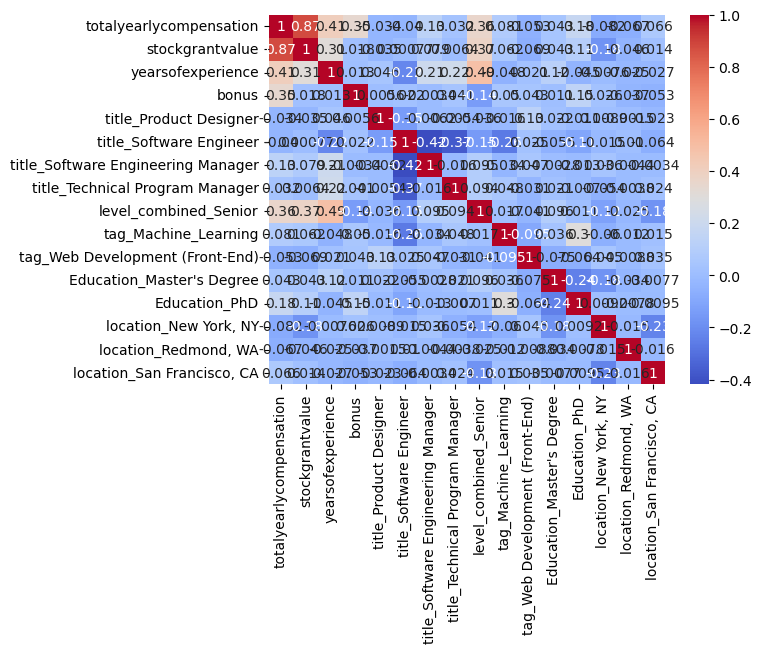

In [264]:
# Calculate the correlation matrix of the cleaned DataFrame
correlation_matrix = cleaned_df.corr()

# Plot the correlation matrix using seaborn's heatmap function
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the plot
plt.show()

## OLS Regression Analysis: Fitting the Model and Displaying Detailed Statistical Results


In [265]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Use statsmodels for a more detailed regression output (including p-values, R-squared)
# Add a constant term to the model
X_with_intercept = sm.add_constant(X)

# Create an OLS (Ordinary Least Squares) model and fit it to the data
ols_model = sm.OLS(y, X_with_intercept).fit()

# Print a detailed summary of the regression
print(ols_model.summary())

Coefficients: [ 1.20954512e+00  1.90612153e+03  1.34416237e+00  1.15836472e+04
  6.56312647e+03  2.11559153e+04 -3.83682128e+03  8.04810176e+03
  1.63985151e+03 -4.31955699e+03  1.67909493e+03  1.45780526e+04
  1.13058811e+04 -7.17006337e+03  1.46423659e+04]
Intercept: 106888.57229471856
                               OLS Regression Results                              
Dep. Variable:     totalyearlycompensation   R-squared:                       0.911
Model:                                 OLS   Adj. R-squared:                  0.910
Method:                      Least Squares   F-statistic:                     1254.
Date:                     Wed, 20 Nov 2024   Prob (F-statistic):               0.00
Time:                             15:58:43   Log-Likelihood:                -20651.
No. Observations:                     1851   AIC:                         4.133e+04
Df Residuals:                         1835   BIC:                         4.142e+04
Df Model:                              

## Multicollinearity Check Using VIF: Calculating the Variance Inflation Factor for Each Feature


In [266]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming you already have a dataframe `df` with your independent variables (X)
# You can adjust the dataframe to include only numeric columns that you want to check for multicollinearity.

# Select the independent variables (you might need to exclude the dependent variable 'totalyearlycompensation')
X = cleaned_df.drop("totalyearlycompensation", axis=1)

# Add a constant to the dataframe (required for the VIF calculation)
X = add_constant(X)

# Calculate the VIF for each feature
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the results
print(vif_data)

                              Variable        VIF
0                                const  28.167064
1                      stockgrantvalue   1.283650
2                    yearsofexperience   1.523794
3                                bonus   1.080997
4               title_Product Designer   1.071395
5              title_Software Engineer   1.783769
6   title_Software Engineering Manager   1.372059
7      title_Technical Program Manager   1.285387
8                level_combined_Senior   1.592466
9                 tag_Machine_Learning   1.240119
10     tag_Web Development (Front-End)   1.050011
11           Education_Master's Degree   1.148044
12                       Education_PhD   1.237832
13               location_New York, NY   1.167456
14                location_Redmond, WA   1.006482
15          location_San Francisco, CA   1.148137


## Lasso Regression Model and Evaluation: Training, Prediction, and Performance Metrics


In [267]:

# Step 1: Initialize Lasso with a specified alpha value
alpha = 0.1  # You can change this value to any desired alpha
lasso = Lasso(alpha=alpha)

# Step 2: Train the Lasso model
lasso.fit(X_train, y_train)

# Step 3: Make predictions using the test set
y_pred = lasso.predict(X_test)

# Step 4: Evaluate the model using appropriate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

# Step 5: Print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R2 Score: {r2}")

# Optional: Check the coefficients of the features
print(f"Model Coefficients: {lasso.coef_}")
print(f"Intercept: {lasso.intercept_}")

Mean Squared Error: 278258705.9447008
Root Mean Squared Error: 16681.088272193178
R2 Score: 0.9095996188319849
Model Coefficients: [ 1.20955555e+00  1.90617130e+03  1.34416354e+00  1.15024480e+04
  6.55751142e+03  2.11438397e+04 -3.83342311e+03  8.04660676e+03
  1.63794310e+03 -4.31681278e+03  1.67860037e+03  1.45757602e+04
  1.13048676e+04 -7.02252452e+03  1.46408545e+04]
Intercept: 106894.49918946304


## Checking for Overfitting with Linear Regression: Evaluating Training and Test Performance


In [268]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the training data
y_train_pred = model.predict(X_train)

# Calculate the R² score and mean squared error (MSE) for the training data
train_r2 = r2_score(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Predict on the test data
y_test_pred = model.predict(X_test)

# Calculate the R² score and mean squared error (MSE) for the test data
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the R² scores and MSE values for both training and test data
print(f"Training R²: {train_r2:.4f}, Training MSE: {train_mse:.4f}")
print(f"Test R²: {test_r2:.4f}, Test MSE: {test_mse:.4f}")

Training R²: 0.9108, Training MSE: 291759459.8233
Test R²: 0.9096, Test MSE: 278266261.5750
